<a href="https://colab.research.google.com/github/fathimasana-pattupara/Capstone/blob/main/Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Read the uploaded file into a pandas DataFrame
  # Assuming the uploaded file is a CSV. You might need to adjust for other formats.
  try:
    data = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    print("File successfully loaded into a DataFrame.")
    print(data.head())
  except Exception as e:
    print(f"Error reading file {fn}: {e}")
  break # Assuming only one file is uploaded or we only process the first one

Saving airline-passengers.csv to airline-passengers (1).csv
User uploaded file "airline-passengers (1).csv" with length 2190 bytes
File successfully loaded into a DataFrame.
     month  total_passengers
0  1949-01               112
1  1949-02               118
2  1949-03               132
3  1949-04               129
4  1949-05               121


Index(['total_passengers'], dtype='object')


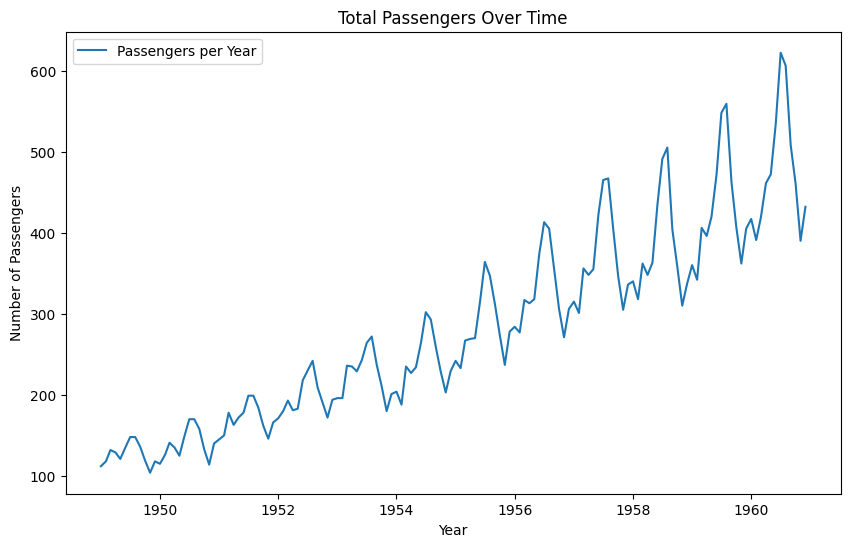

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset (Assuming the data has already been loaded from the previous cell)
# The 'data' variable is already available from the previous upload.

# Assuming the column containing year information is 'month'
# Convert the 'month' column to datetime, assuming format is Year-Month ('%Y-%m')
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data.set_index('month', inplace=True) # Set 'month' as index

# Print the column names to verify the change
print(data.columns)

# Extract the total_passengers column
series = data['total_passengers']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(series, label='Passengers per Year')
plt.title('Total Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Split data into train and test sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]